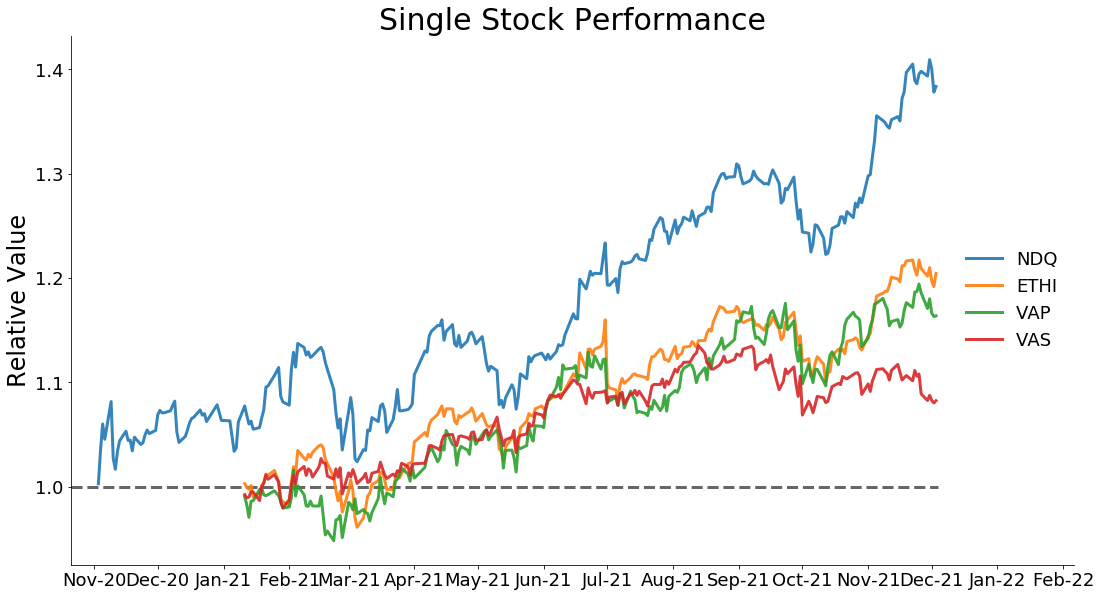

In [1]:
import datetime as dt
import pandas as pd
from siif_utils import Comp, plot_shares, plot_comps
import warnings
warnings.filterwarnings("ignore")
from time import sleep
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

SMALL, MED, LARGE, LW = 18, 24, 30, 3
plt.rc('axes', titlesize=MED)    # fontsize of the axes title
plt.rc('axes', labelsize=MED)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL)   # fontsize of the tick labels
plt.rc('legend', fontsize=MED)   # legend fontsize
plt.rc('font', size=LARGE)         # controls default text sizes

comp = Comp('SIIF', 'TEST')

plot_shares(comp, save=True)

In [2]:
def plot(share):
    ''' Plots individual share trade points '''
    fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)

    start = comp.portfolio_value.index[-1]
    
    df = share.timeline
    held = df[df.units > 0]
    start = min(start, held.index[0])

    ax.plot(held.index, held.price / held.transaction_price.iloc[0], label=share.code, alpha=0.9, lw=LW)

    # Trade points
    buy = df[df.units_diff > 0]
    sel = df[df.units_diff < 0]
    ax.scatter(buy.index, buy.price / held.transaction_price.iloc[0], c='lime', zorder=10, s=100, marker='^')
    ax.scatter(sel.index, sel.price / held.transaction_price.iloc[0], c='red' , zorder=10, s=100, marker='v')
    
    # Aesthetics
    plt.axhline(1, xmax=0.865, linestyle='--', lw=LW, c='black', alpha=0.6, zorder=-1)
    sns.despine()
    ax.set_title(share.code + ' Performance', fontsize=LARGE)
    ax.set_ylabel('Relative Value')

    # Format the date into months & days
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) 

    # Change the tick interval
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 

    # Puts x-axis labels on an angle
    #plt.gca().xaxis.set_tick_params(rotation = 30)  

    # Changes x-axis range
    held = comp.portfolio_value[comp.portfolio_value.index >= start].index
    diff = (held[-1] - held[0])
    ax.set_xbound(held[0] - pd.Timedelta(10*diff/300, 'days'), 
                  held[-1] + pd.Timedelta(5*diff/30, 'days'))

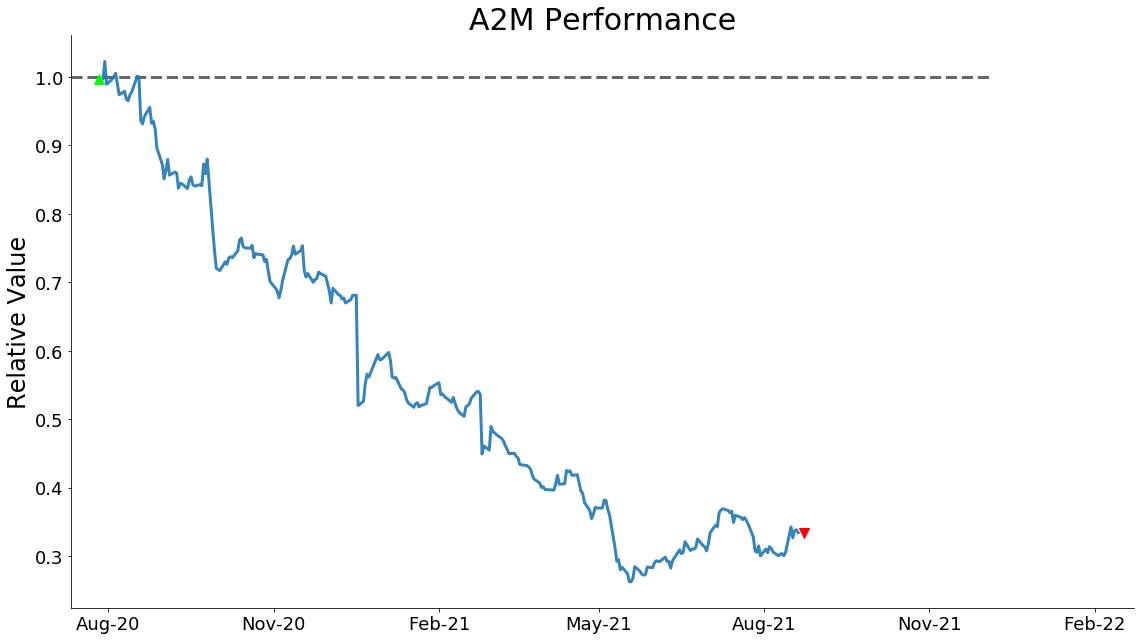

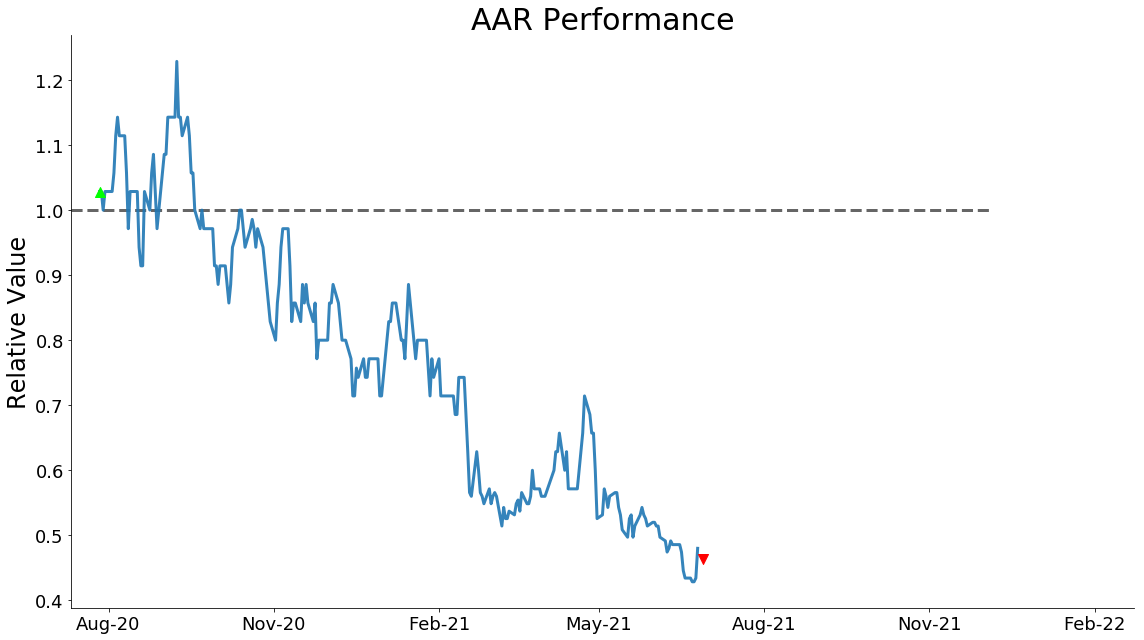

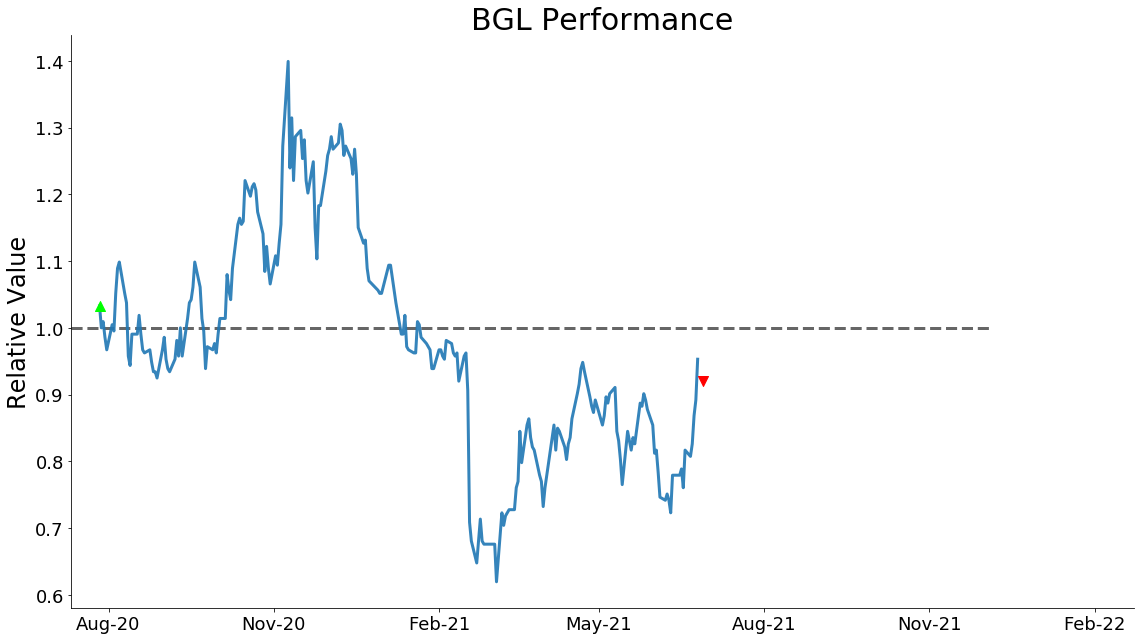

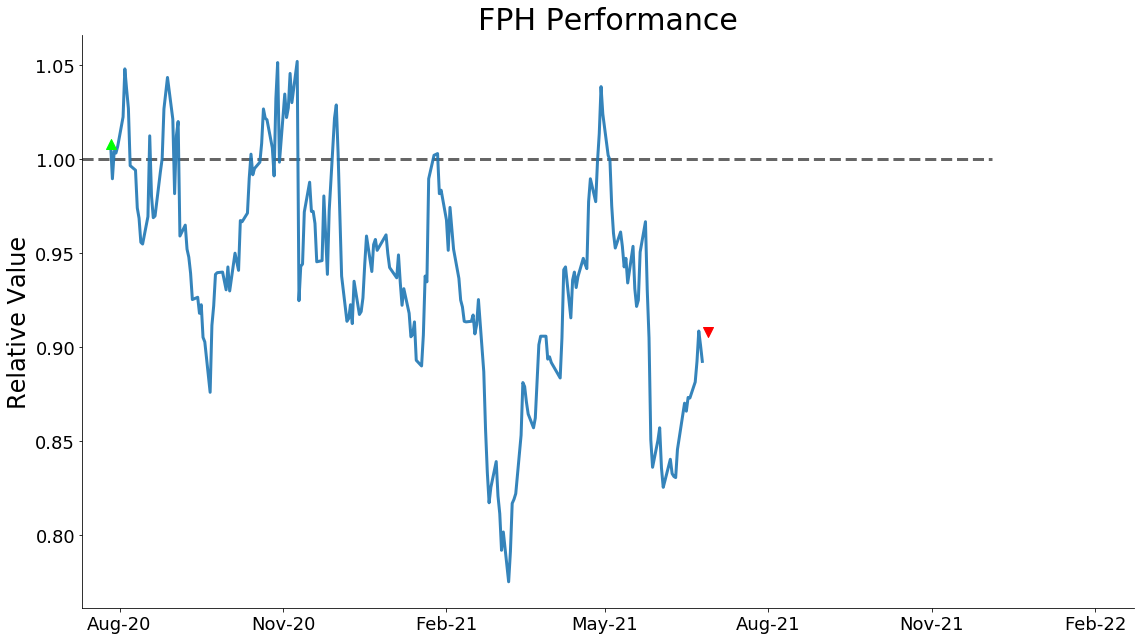

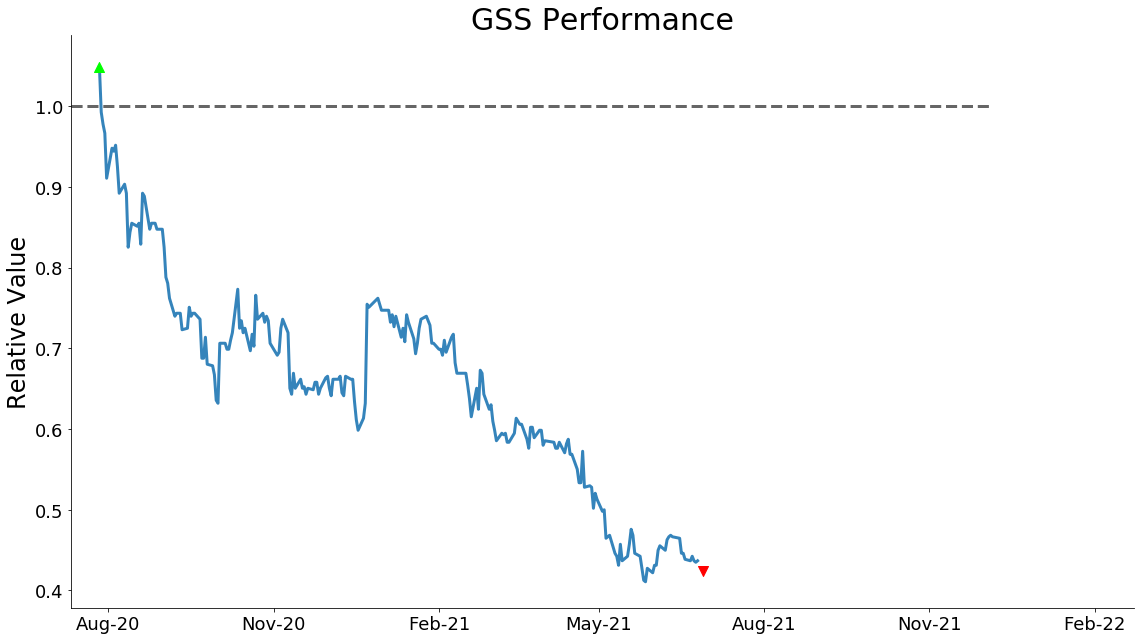

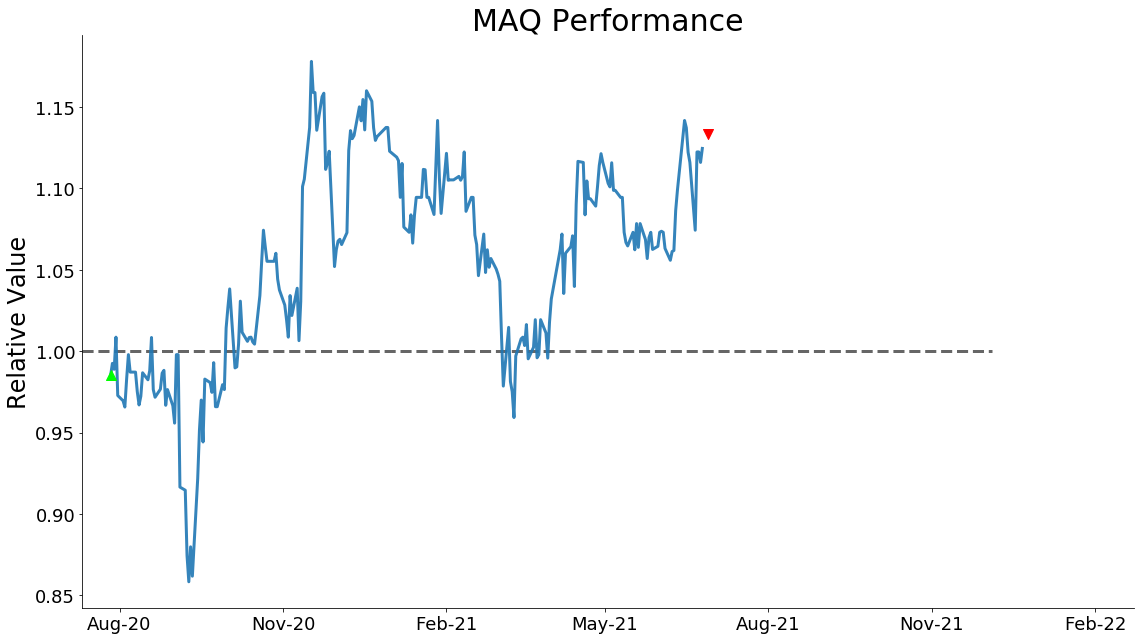

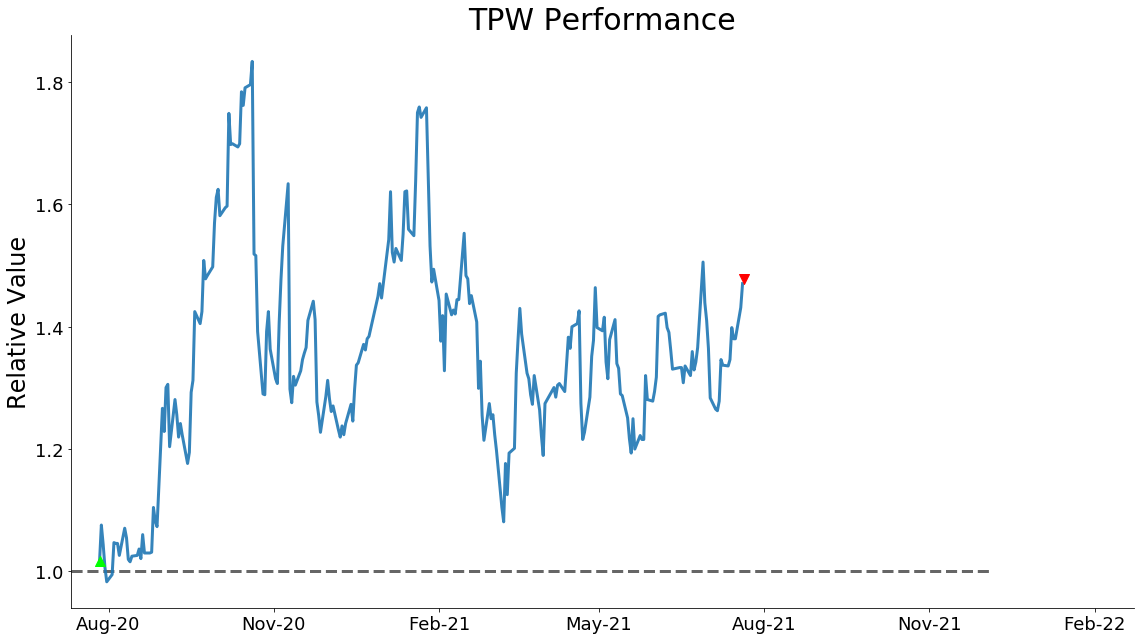

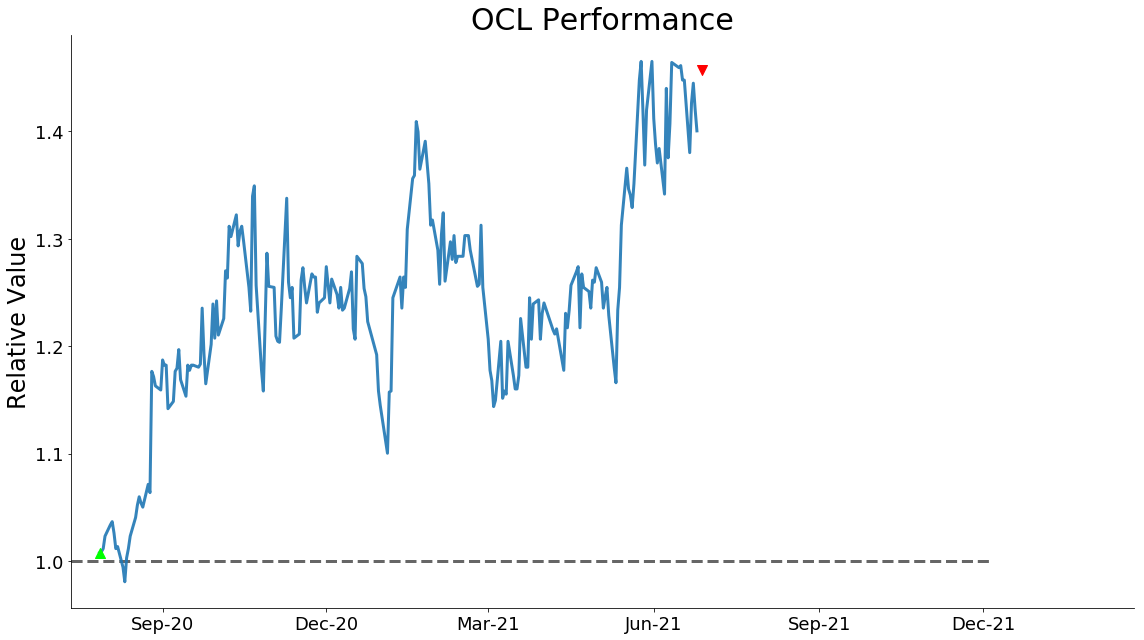

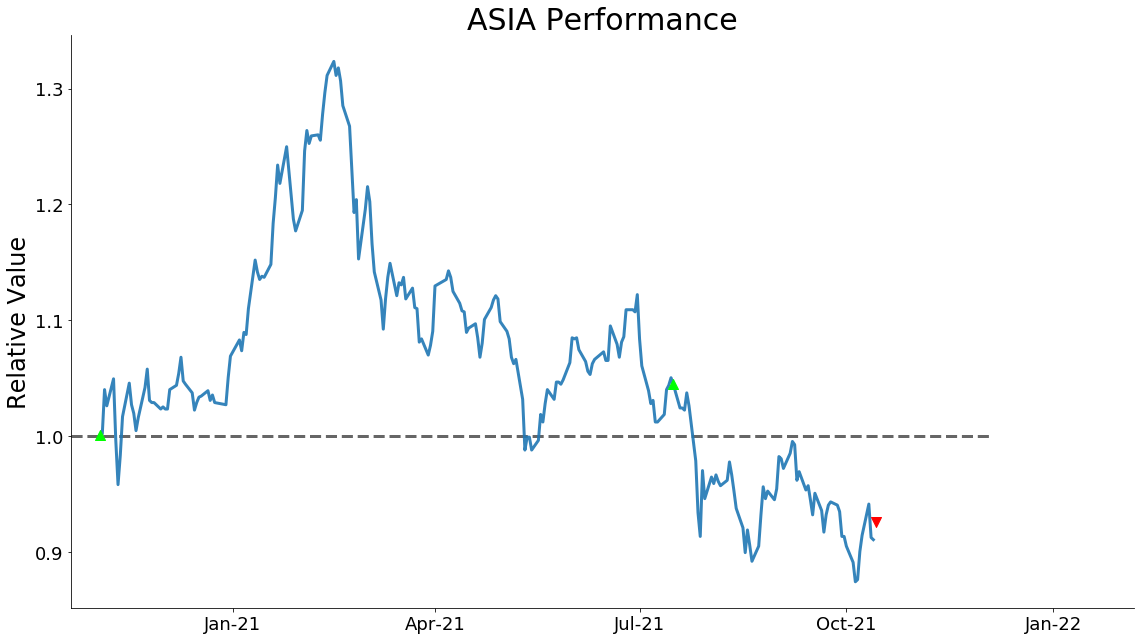

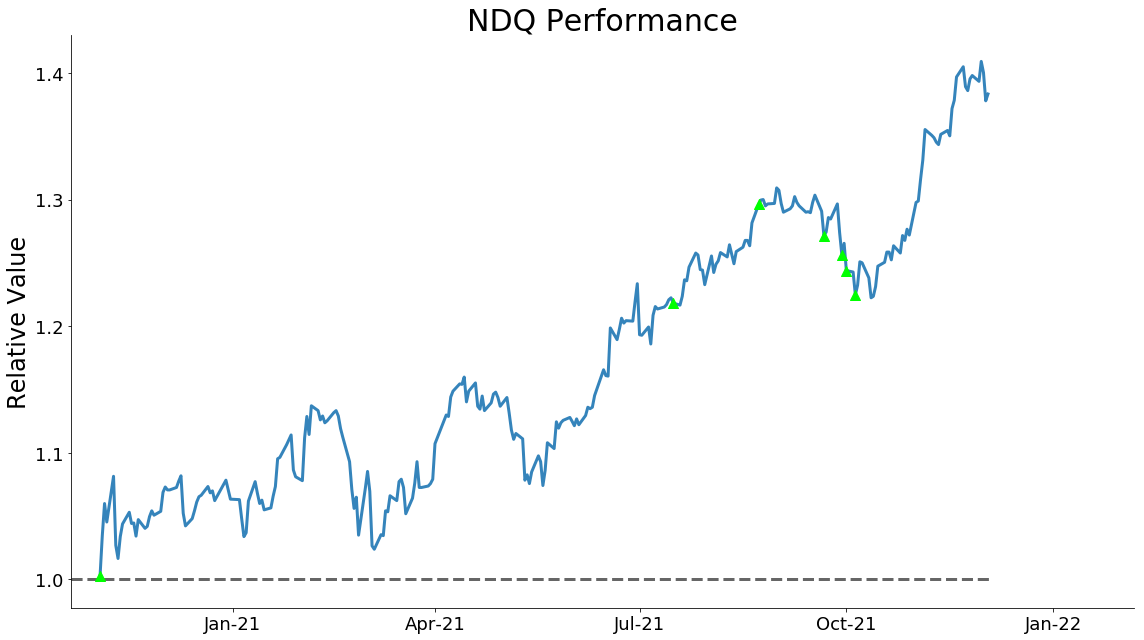

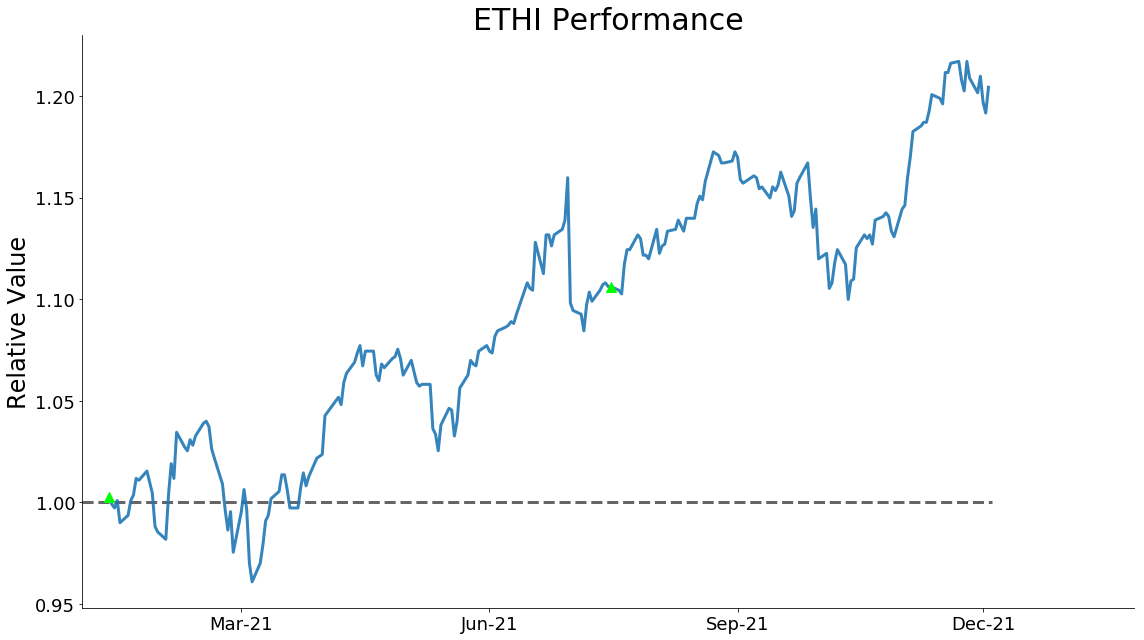

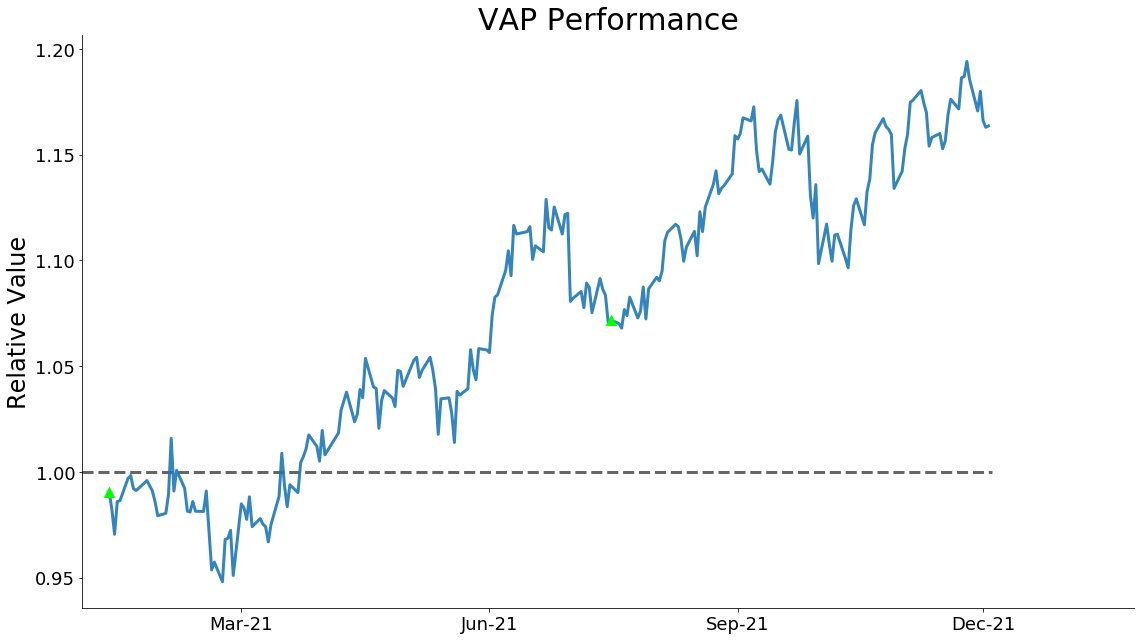

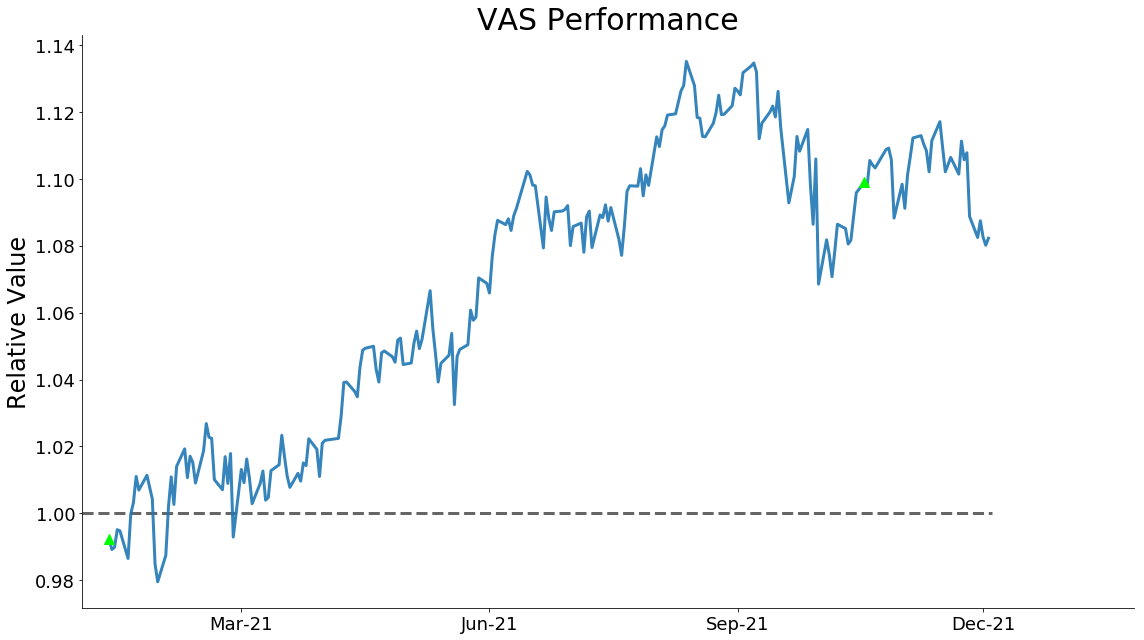

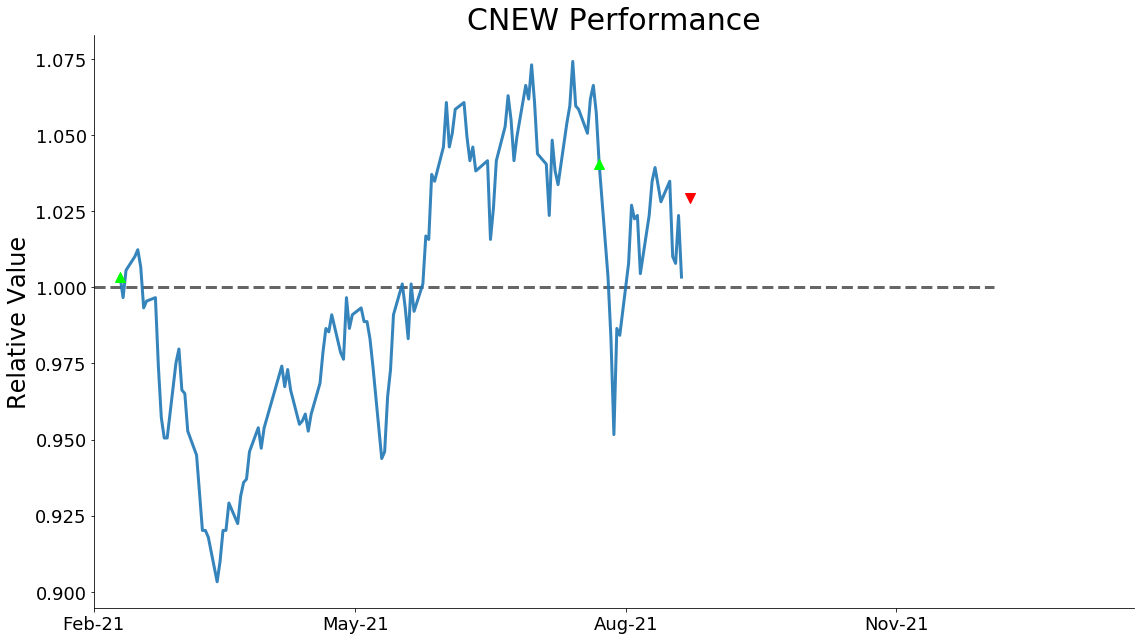

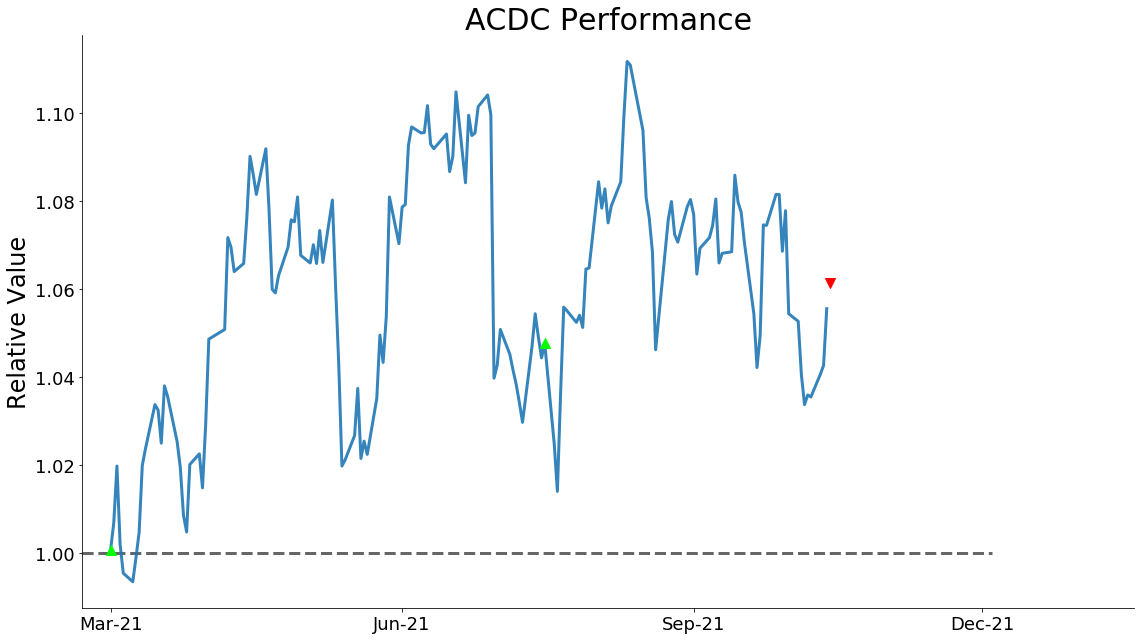

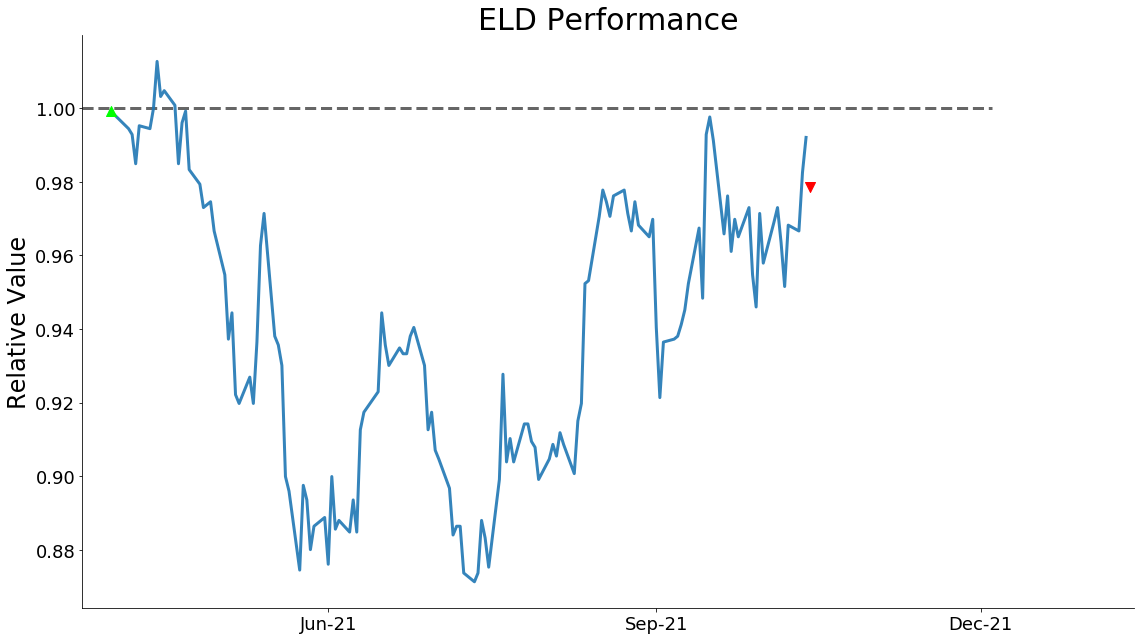

In [3]:
for share in comp.shares:
    plot(share)